In [33]:
import ravdess3 as rvd

In [2]:
import numpy as np
import keras
from keras import layers
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
loader = rvd.Loader()
X, y = loader.load_via_joblib()

In [4]:
X = rvd.get_mfcc(X, 22050, n_mfcc=128)

'Done: 1440'

In [5]:
idxs = np.random.permutation(len(X))
X = X[idxs]

In [7]:
X_a = np.reshape(X, (1440, 128, 1))

In [8]:
from keras.utils import to_categorical

y = loader.labels
y = y[idxs]
y = y - 1
y_a = to_categorical(y)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.1, random_state=42)

In [24]:
model = Sequential([
    layers.Conv1D(128, 5, input_shape=(128, 1), padding='same'),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.MaxPooling1D(8),
    layers.Conv1D(128, 5, padding='same'),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(8, activation='sigmoid')
])

In [25]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='seq_conv1D_augfree.h5', monitor='val_loss', save_best_only=True)
]

In [27]:
history = model.fit(X_train, y_train, epochs=40, validation_split=0.1, batch_size=16, callbacks=callbacks)

Train on 1166 samples, validate on 130 samples
Epoch 1/40
1166/1166 [==============================] - 1s 908us/step - loss: 2.2471 - acc: 0.1046 - val_loss: 2.0794 - val_acc: 0.0462
Epoch 2/40
1166/1166 [==============================] - 0s 408us/step - loss: 2.0794 - acc: 0.0729 - val_loss: 2.0794 - val_acc: 0.0462
Epoch 3/40
1166/1166 [==============================] - 0s 395us/step - loss: 2.0803 - acc: 0.0772 - val_loss: 2.6000 - val_acc: 0.1692
Epoch 4/40
1166/1166 [==============================] - 1s 437us/step - loss: 2.9790 - acc: 0.1295 - val_loss: 2.6000 - val_acc: 0.1692
Epoch 5/40
1166/1166 [==============================] - 0s 395us/step - loss: 4.0737 - acc: 0.0772 - val_loss: 6.1999 - val_acc: 0.0462
Epoch 6/40
1166/1166 [==============================] - 0s 407us/step - loss: 4.9282 - acc: 0.1235 - val_loss: 4.9876 - val_acc: 0.1692
Epoch 7/40
1166/1166 [==============================] - 0s 408us/step - loss: 4.9567 - acc: 0.1295 - val_loss: 7.3013 - val_acc: 0.1692
E

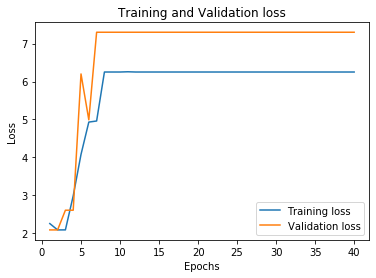

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 41)

plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values,  label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
best_model = keras.models.load_model('seq_conv1D_augfree.h5')

In [30]:
val_loss, val_acc = best_model.evaluate(X_test, y_test)

144/144 [==============================] - 0s 739us/step


In [31]:
val_loss, val_acc

(2.079441547393799, 0.0347222238779068)

In [32]:
predictions = best_model.predict(X_test)